In [ ]:
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.






Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/Eternity/transaction_data.csv')

In [5]:
df.shape

(5315, 3)

In [6]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [15]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [16]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


### Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.


In [17]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [18]:
df['transaction']

0         cancelled
1       successfull
2       successfull
3         cancelled
4         cancelled
           ...     
5310    successfull
5311    successfull
5312    successfull
5313    successfull
5314      cancelled
Name: transaction, Length: 5315, dtype: object

In [19]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [30]:
transaction = df.groupby('transaction', as_index=False) \
                .agg({'date': 'count'}) \
                .rename(columns={'date': 'count'}) \
                .sort_values('count', ascending=False) 

In [31]:
transaction

,transaction,count
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='count'>

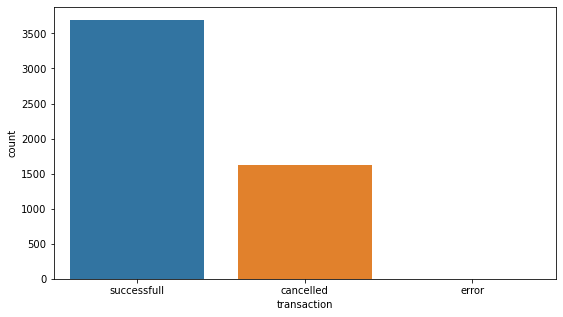

In [37]:
plt.figure(figsize=(9,5))
sns.barplot(x='transaction', y='count', data=transaction)

### Сколько транзакций завершились ошибкой?

In [42]:
df[df.transaction == 'error'].transaction.count()

4

### Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


In [43]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [48]:
succ_per_user= df.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'}) \
    .rename(columns={'transaction': 'count'})

In [49]:
succ_per_user.head()

,name,count
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


<AxesSubplot:ylabel='Count'>

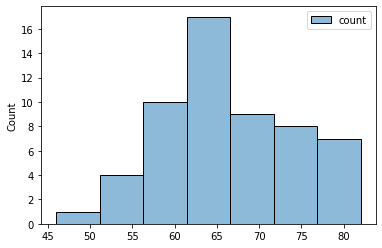

In [50]:
sns.histplot(succ_per_user)

### Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


In [58]:
df_updated = pd.read_csv('C:/Users/Eternity/transaction_data_updated.csv')

In [59]:
df_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [78]:
new_df = df_updated.groupby(['name', 'minute'], as_index=False) \
            .agg({'transaction': 'count'}) \
            .rename(columns={'transaction': 'transactions'})

In [81]:
new_df = new_df.pivot(index='minute', columns='name', values='transactions')

In [87]:
new_df.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [84]:
new_df.fillna(0, inplace=True)


In [85]:
new_df.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [90]:
pivoted = df_updated.pivot_table(index='minute', columns='name', values='transaction', aggfunc='count', fill_value=0)

In [91]:
pivoted.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
